# Feature Engineering

* ## Categorical and Numeric Engineering
* ## Text Encoding

In [32]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

In [33]:
so_survey_df=pd.read_csv(r'G:\Mi unidad\Universidad\Uni\Data science\Heavy Datasets\stackoverflow_Data.csv')

print(so_survey_df.head())
print('---------------------------------------------------------')
print(so_survey_df.dtypes)

      SurveyDate                                    FormalEducation  \
0  2/28/18 20:20           Bachelor's degree (BA. BS. B.Eng.. etc.)   
1  6/28/18 13:26           Bachelor's degree (BA. BS. B.Eng.. etc.)   
2    6/6/18 3:37           Bachelor's degree (BA. BS. B.Eng.. etc.)   
3    5/9/18 1:06  Some college/university study without earning ...   
4  4/12/18 22:41           Bachelor's degree (BA. BS. B.Eng.. etc.)   

   ConvertedSalary Hobby       Country  StackOverflowJobsRecommend  \
0              NaN   Yes  South Africa                         NaN   
1          70841.0   Yes       Sweeden                         7.0   
2              NaN    No       Sweeden                         8.0   
3          21426.0   Yes       Sweeden                         NaN   
4          41671.0   Yes            UK                         8.0   

      VersionControl  Age  Years Experience Gender   RawSalary  
0                Git   21                13   Male         NaN  
1     Git;Subversion  

In [34]:
# Create subset of only the numeric columns
so_numeric_df = so_survey_df.select_dtypes(include=['int','float'])

print(so_numeric_df.columns)

Index(['ConvertedSalary', 'StackOverflowJobsRecommend', 'Age',
       'Years Experience'],
      dtype='object')


### Dealing with categorical variables
* One-hot encoding
* get_dummies(df,columns=[],prefix='')

In [35]:
# Convert the Country column to a one hot encoded Data Frame
one_hot_encoded = pd.get_dummies(so_survey_df, columns=['Country'], prefix='OH')

# Print the columns names
print(one_hot_encoded.columns)

Index(['SurveyDate', 'FormalEducation', 'ConvertedSalary', 'Hobby',
       'StackOverflowJobsRecommend', 'VersionControl', 'Age',
       'Years Experience', 'Gender', 'RawSalary', 'OH_France', 'OH_India',
       'OH_Ireland', 'OH_Russia', 'OH_South Africa', 'OH_Spain', 'OH_Sweeden',
       'OH_UK', 'OH_USA', 'OH_Ukraine'],
      dtype='object')


In [36]:
# Create dummy variables for the Country column
dummy = pd.get_dummies(so_survey_df, columns=['Country'], drop_first=True, prefix='DM')

# Print the columns names
print(dummy.columns)

Index(['SurveyDate', 'FormalEducation', 'ConvertedSalary', 'Hobby',
       'StackOverflowJobsRecommend', 'VersionControl', 'Age',
       'Years Experience', 'Gender', 'RawSalary', 'DM_India', 'DM_Ireland',
       'DM_Russia', 'DM_South Africa', 'DM_Spain', 'DM_Sweeden', 'DM_UK',
       'DM_USA', 'DM_Ukraine'],
      dtype='object')


La diferencia entre ambas es que dummy variables elimina el primer valor dejando una columna menos

siguiente

Crearemos una mask para poder reemplazar los valores que menos se repiten a lo largo del dataset y así agruparlos en otra categoria

In [37]:
# Create a series out of the Country column
countries = so_survey_df['Country']

# Get the counts of each category
country_counts = countries.value_counts()

# Create a mask for only categories that occur less than 10 times
mask = countries.isin(country_counts[country_counts < 10].index)

# Label all other categories as Other
countries[mask] = 'Other'

# Print the updated category counts
print(countries.value_counts())

South Africa    166
USA             164
Spain           134
Sweeden         119
France          115
Russia           97
UK               95
India            95
Other            14
Name: Country, dtype: int64


### Numeric Variables

In [38]:
so_survey_df.ConvertedSalary.fillna(value=0,inplace=True)

# Create the Paid_Job column filled with zeros
so_survey_df['Paid_Job'] = 0

# Replace all the Paid_Job values where ConvertedSalary is > 0
so_survey_df.loc[so_survey_df['ConvertedSalary']>0, 'Paid_Job'] = 1

# Print the first five rows of the columns
print(so_survey_df[['Paid_Job', 'ConvertedSalary']].head())

   Paid_Job  ConvertedSalary
0         0              0.0
1         1          70841.0
2         0              0.0
3         1          21426.0
4         1          41671.0


In [39]:
# Bin the continuous variable ConvertedSalary into 5 bins
so_survey_df['equal_binned'] = pd.cut(so_survey_df['ConvertedSalary'], bins=5)

# Print the first 5 rows of the equal_binned column
print(so_survey_df[['equal_binned', 'ConvertedSalary']].head())


print('------------defining limits--------------- ')
# Specify the boundaries of the bins
bins = [-np.inf, 10000, 50000, 100000, 150000, np.inf]

# Bin labels
labels = ['Very low', 'Low', 'Medium', 'High', 'Very high']

# Bin the continuous variable ConvertedSalary using these boundaries
so_survey_df['boundary_binned'] = pd.cut(so_survey_df['ConvertedSalary'], 
                                         bins=bins, labels=labels)

# Print the first 5 rows of the boundary_binned column
print(so_survey_df[['boundary_binned', 'ConvertedSalary']].head())

          equal_binned  ConvertedSalary
0  (-2000.0, 400000.0]              0.0
1  (-2000.0, 400000.0]          70841.0
2  (-2000.0, 400000.0]              0.0
3  (-2000.0, 400000.0]          21426.0
4  (-2000.0, 400000.0]          41671.0
------------defining limits--------------- 
  boundary_binned  ConvertedSalary
0        Very low              0.0
1          Medium          70841.0
2        Very low              0.0
3             Low          21426.0
4             Low          41671.0


## Missing and null values

In [40]:
# Subset the DataFrame
sub_df = so_survey_df[['Age','Gender']]
# Print the number of non-missing values
print(sub_df.notnull().sum())

Age       999
Gender    693
dtype: int64


In [41]:
# Create a new DataFrame dropping all incomplete0'any rows
no_missing_values_rows = so_survey_df.dropna(how='any')

# Print the shape of the new DataFrame
print(no_missing_values_rows.shape)

(264, 14)


In [42]:
# Create a new DataFrame dropping all columns with incomplete rows
no_missing_values_cols = so_survey_df.dropna(how='any', axis=1)

# Print the shape of the new DataFrame
print(no_missing_values_cols.shape)

(999, 11)


In [43]:
# Drop all rows where Gender is missing
no_gender = so_survey_df.dropna(subset=['Gender'])

# Print the shape of the new DataFrame
print(no_gender.shape)

(693, 14)


In [44]:
print(so_survey_df['StackOverflowJobsRecommend'].head())

print('-----------------------------------------')
# Fill missing values with the mean
so_survey_df['StackOverflowJobsRecommend'].fillna(so_survey_df['StackOverflowJobsRecommend'].median(), inplace=True)

# Round the StackOverflowJobsRecommend values
so_survey_df['StackOverflowJobsRecommend'] = round(so_survey_df['StackOverflowJobsRecommend'])

# Print the top 5 rows
print(so_survey_df['StackOverflowJobsRecommend'].head())

0    NaN
1    7.0
2    8.0
3    NaN
4    8.0
Name: StackOverflowJobsRecommend, dtype: float64
-----------------------------------------
0    7.0
1    7.0
2    8.0
3    7.0
4    8.0
Name: StackOverflowJobsRecommend, dtype: float64


### When working with predictive models you will often have a separate train and test DataFrames. In these cases you want to ensure no information from your test set leaks into your train set. When filling missing values in data to be used in these situations how should approach the two data sets?

### Apply the measures of central tendency (mean/median etc.) calculated on the train set to both the train and test sets.

## eliminar partes de una row

In [45]:
# Remove the commas in the column
so_survey_df['RawSalary'] = so_survey_df['RawSalary'].str.replace(',', '')

# Remove the dollar signs in the column
so_survey_df['RawSalary'] = so_survey_df['RawSalary'].str.replace('$', '')

In [46]:
# Attempt to convert the column to numeric values
numeric_vals = pd.to_numeric(so_survey_df['RawSalary'], errors='coerce')

# Find the indexes of missing values
idx = numeric_vals.isna()

# Print the relevant rows
print(so_survey_df['RawSalary'][idx])

0            NaN
2            NaN
4      £41671.00
6            NaN
8            NaN
         ...    
989          NaN
990          NaN
992          NaN
994          NaN
997          NaN
Name: RawSalary, Length: 401, dtype: object


In [47]:
# Replace the offending characters
so_survey_df['RawSalary'] = so_survey_df['RawSalary'].str.replace('£','')

# Convert the column to float
so_survey_df['RawSalary'] = so_survey_df['RawSalary'].astype('float')

# Print the column
print(so_survey_df['RawSalary'])

0            NaN
1        70841.0
2            NaN
3        21426.0
4        41671.0
         ...    
994          NaN
995      58746.0
996      55000.0
997          NaN
998    1000000.0
Name: RawSalary, Length: 999, dtype: float64


### Remember that even after removing all the relevant characters, you still need to change the type of the column to numeric if you want to plot these continuous values.

In [48]:
# Import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

#When you know the the data has a strict upper and lower bound

# Instantiate MinMaxScaler
MM_scaler = MinMaxScaler()

# Fit MM_scaler to the data
MM_scaler.fit(so_numeric_df[['Age']])

# Transform the data using the fitted scaler
so_numeric_df['Age_MM'] = MM_scaler.transform(so_numeric_df[['Age']])

# Compare the origional and transformed column
print(so_numeric_df[['Age_MM', 'Age']].head())

     Age_MM  Age
0  0.046154   21
1  0.307692   38
2  0.415385   45
3  0.430769   46
4  0.323077   39


all values have been scaled between 0 and 1

In [49]:
# Import StandardScaler
from sklearn.preprocessing import StandardScaler


# Instantiate StandardScaler
SS_scaler = StandardScaler()

# Fit SS_scaler to the data
SS_scaler.fit(so_numeric_df[['Age']])

# Transform the data using the fitted scaler
so_numeric_df['Age_SS'] = SS_scaler.transform(so_numeric_df[['Age']])

# Compare the origional and transformed column
print(so_numeric_df[['Age_SS', 'Age']].head())

     Age_SS  Age
0 -1.132431   21
1  0.150734   38
2  0.679096   45
3  0.754576   46
4  0.226214   39


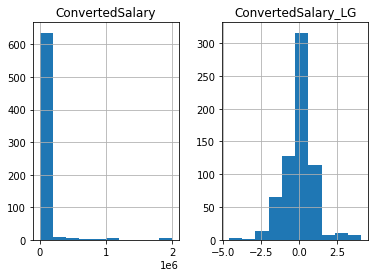

In [50]:
# Import PowerTransformer
from sklearn.preprocessing import PowerTransformer

# Instantiate PowerTransformer
pow_trans = PowerTransformer()

# Train the transform on the data
pow_trans.fit(so_numeric_df[['ConvertedSalary']])

# Apply the power transform to the data
so_numeric_df['ConvertedSalary_LG'] = pow_trans.transform(so_numeric_df[['ConvertedSalary']])

# Plot the data before and after the transformation
so_numeric_df[['ConvertedSalary', 'ConvertedSalary_LG']].hist()
plt.show()

## Deleting outliers

### eliminar los valores que esten fuera del 95% de los valores

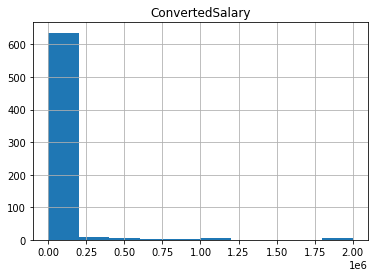

<Figure size 432x288 with 0 Axes>

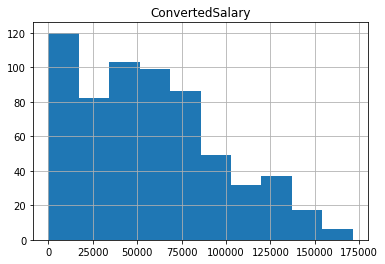

In [51]:
# Find the 95th quantile
quantile = so_numeric_df['ConvertedSalary'].quantile(0.95)

# Trim the outliers
trimmed_df = so_numeric_df[so_numeric_df['ConvertedSalary'] < quantile]

# The original histogram
so_numeric_df[['ConvertedSalary']].hist()
plt.show()
plt.clf()

# The trimmed histogram
trimmed_df[['ConvertedSalary']].hist()
plt.show()


### eliminar todos lo valores que se alejan 3 stds

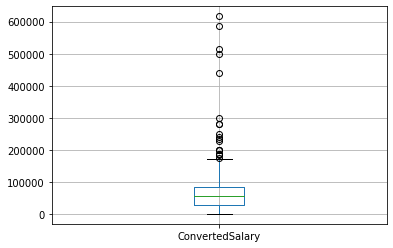

In [52]:
# Find the mean and standard dev
std = so_numeric_df['ConvertedSalary'].std()
mean = so_numeric_df['ConvertedSalary'].mean()

# Calculate the cutoff
cut_off = std * 3
lower, upper = mean - cut_off,mean + cut_off

# Trim the outliers
trimmed_df = so_numeric_df[(so_numeric_df['ConvertedSalary'] < upper) & (so_numeric_df['ConvertedSalary'] > lower)]

# The trimmed box plot
trimmed_df[['ConvertedSalary']].boxplot()
plt.show()

### igual se ven outliers pero se eliminaron muchos mas

## train test

In [53]:
# Import StandardScaler
from sklearn.preprocessing import StandardScaler

# Apply a standard scaler to the data
SS_scaler = StandardScaler()

# Fit the standard scaler to the data
SS_scaler.fit(so_train_numeric[['Age']])

# Transform the test data using the fitted scaler
so_test_numeric['Age_ss'] = SS_scaler.transform(so_test_numeric[['Age']])
print(so_test_numeric[['Age', 'Age_ss']].head())

NameError: name 'so_train_numeric' is not defined

In [55]:
train_std = so_train_numeric['ConvertedSalary'].std()
train_mean = so_train_numeric['ConvertedSalary'].mean()

cut_off = train_std * 3
train_lower, train_upper = train_mean - cut_off, train_mean + cut_off

# Trim the test DataFrame
trimmed_df = so_test_numeric[(so_test_numeric['ConvertedSalary'] < train_upper) \
                             & (so_test_numeric['ConvertedSalary'] > train_lower)]

NameError: name 'so_train_numeric' is not defined

# Text Encoding

In [56]:
speech_df=pd.read_csv(r"G:\Mi unidad\Universidad\Uni\Data science\Heavy Datasets\inaugural_speeches.csv")
speech_df.head()

,Name,Inaugural Address,Date,text
0,George Washington,First Inaugural Address,"Thursday, April 30, 1789",Fellow-Citizens of the Senate and of the House...
1,George Washington,Second Inaugural Address,"Monday, March 4, 1793",Fellow Citizens: I AM again called upon by th...
2,John Adams,Inaugural Address,"Saturday, March 4, 1797","WHEN it was first perceived, in early times, t..."
3,Thomas Jefferson,First Inaugural Address,"Wednesday, March 4, 1801",Friends and Fellow-Citizens: CALLED upon to u...
4,Thomas Jefferson,Second Inaugural Address,"Monday, March 4, 1805","PROCEEDING, fellow-citizens, to that qualifica..."


In [57]:
# Replace all non letter characters with a whitespace
speech_df['text_clean'] = speech_df['text'].str.replace('[^a-zA-Z]', ' ')

# Change to lower case
speech_df['text_clean'] = speech_df['text_clean'].str.lower()

# Print the first 5 rows of the text_clean column
print(speech_df['text_clean'].head())

0    fellow citizens of the senate and of the house...
1    fellow citizens   i am again called upon by th...
2    when it was first perceived  in early times  t...
3    friends and fellow citizens   called upon to u...
4    proceeding  fellow citizens  to that qualifica...
Name: text_clean, dtype: object


In [58]:
# Find the length of each text
speech_df['char_cnt'] = speech_df['text_clean'].str.len()

# Count the number of words in each text
speech_df['word_cnt'] = speech_df['text_clean'].str.split().str.len()

# Find the average length of word
speech_df['avg_word_length'] = speech_df['char_cnt'] / speech_df['word_cnt']

# Print the first 5 rows of these columns
print(speech_df[['text_clean', 'char_cnt', 'word_cnt', 'avg_word_length']])

                                           text_clean  char_cnt  word_cnt  \
0   fellow citizens of the senate and of the house...      8616      1432   
1   fellow citizens   i am again called upon by th...       787       135   
2   when it was first perceived  in early times  t...     13871      2323   
3   friends and fellow citizens   called upon to u...     10144      1736   
4   proceeding  fellow citizens  to that qualifica...     12902      2169   
5   unwilling to depart from examples of the most ...      7003      1179   
6   about to add the solemnity of an oath to the o...      7148      1211   
7   i should be destitute of feeling if i was not ...     19894      3382   
8   fellow citizens   i shall not attempt to descr...     26322      4466   
9   in compliance with an usage coeval with the ex...     17753      2922   
10  fellow citizens   about to undertake the arduo...      6818      1130   
11  fellow citizens   the will of the american peo...      7061      1179   

### Word count representation

In [59]:
# Import CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

# Instantiate CountVectorizer
cv = CountVectorizer()

# Fit the vectorizer
cv.fit(speech_df['text_clean'])

# Print feature name



print(cv.get_feature_names()[0:15])

['abandon', 'abandoned', 'abandonment', 'abate', 'abdicated', 'abeyance', 'abhorring', 'abide', 'abiding', 'abilities', 'ability', 'abject', 'able', 'ably', 'abnormal']


In [60]:
# Apply the vectorizer
cv_transformed = cv.transform(speech_df['text_clean'])

# Print the full array
cv_array = cv_transformed.toarray()

# Print the shape of cv_array
print(cv_array.shape)






# Specify arguements to limit the number of features generated
cv = CountVectorizer(min_df=0.2,max_df=0.8)

# Fit, transform, and convert into array
cv_transformed = cv.fit_transform(speech_df['text_clean'])
cv_array = cv_transformed.toarray()

# Print the array shape
print(cv_array.shape)


(58, 9043)
(58, 818)


Pasé de tener mas de 9000 palabras a solamente 818

In [61]:
# Create a DataFrame with these features
cv_df = pd.DataFrame(cv_array, 
                     columns=cv.get_feature_names()).add_prefix('Counts_')

# Add the new columns to the original DataFrame
speech_df_new = pd.concat([speech_df, cv_df], axis=1, sort=False)
print(speech_df_new.head())

                Name         Inaugural Address                      Date  \
0  George Washington   First Inaugural Address  Thursday, April 30, 1789   
1  George Washington  Second Inaugural Address     Monday, March 4, 1793   
2         John Adams         Inaugural Address   Saturday, March 4, 1797   
3   Thomas Jefferson   First Inaugural Address  Wednesday, March 4, 1801   
4   Thomas Jefferson  Second Inaugural Address     Monday, March 4, 1805   

                                                text  \
0  Fellow-Citizens of the Senate and of the House...   
1  Fellow Citizens:  I AM again called upon by th...   
2  WHEN it was first perceived, in early times, t...   
3  Friends and Fellow-Citizens:  CALLED upon to u...   
4  PROCEEDING, fellow-citizens, to that qualifica...   

                                          text_clean  char_cnt  word_cnt  \
0  fellow citizens of the senate and of the house...      8616      1432   
1  fellow citizens   i am again called upon by th...  

## Tfidf Vectorizer

In [62]:
# Import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Instantiate TfidfVectorizer
tv = TfidfVectorizer(max_features=100, stop_words='english')

# Fit the vectroizer and transform the data
tv_transformed = tv.fit_transform(speech_df['text_clean'])

# Create a DataFrame with these features
tv_df = pd.DataFrame(tv_transformed.toarray(), 
                     columns=tv.get_feature_names()).add_prefix('TFIDF_')
print(tv_df.head())

   TFIDF_action  TFIDF_administration  TFIDF_america  TFIDF_american  \
0      0.000000              0.133415       0.000000        0.105388   
1      0.000000              0.261016       0.266097        0.000000   
2      0.000000              0.092436       0.157058        0.073018   
3      0.000000              0.092693       0.000000        0.000000   
4      0.041334              0.039761       0.000000        0.031408   

   TFIDF_americans  TFIDF_believe  TFIDF_best  TFIDF_better  TFIDF_change  \
0              0.0       0.000000    0.000000      0.000000      0.000000   
1              0.0       0.000000    0.000000      0.000000      0.000000   
2              0.0       0.000000    0.026112      0.060460      0.000000   
3              0.0       0.090942    0.117831      0.045471      0.053335   
4              0.0       0.000000    0.067393      0.039011      0.091514   

   TFIDF_citizens  ...  TFIDF_things  TFIDF_time  TFIDF_today  TFIDF_union  \
0        0.229644  ...    

### After creating Tf-idf features you will often want to understand what are the most highest scored words for each corpus. This can be achieved by isolating the row you want to examine and then sorting the the scores from high to low.



In [63]:
# Isolate the row to be examined
sample_row = tv_df.iloc[0]

# Print the top 5 words of the sorted output
print(sample_row.sort_values(ascending=False).head())

TFIDF_government    0.367430
TFIDF_public        0.333237
TFIDF_present       0.315182
TFIDF_duty          0.238637
TFIDF_country       0.229644
Name: 0, dtype: float64


For this exercise the speech_df DataFrame has been split in two:

train_speech_df: The training set consisting of the first 45 speeches.

test_speech_df: The test set consisting of the remaining speeches.

In [64]:
# Instantiate TfidfVectorizer
tv = TfidfVectorizer(max_features=100, stop_words='english')

# Fit the vectroizer and transform the data
tv_transformed = tv.fit_transform(train_speech_df['text_clean'])

# Transform test data
test_tv_transformed = tv.transform(test_speech_df['text_clean'])

# Create new features for the test set
test_tv_df = pd.DataFrame(test_tv_transformed.toarray(), 
                          columns=tv.get_feature_names()).add_prefix('TFIDF_')
print(test_tv_df.head())

NameError: name 'train_speech_df' is not defined

So far you have created features based on individual words in each of the texts. This can be quite powerful when used in a machine learning model but you may be concerned that by looking at words individually a lot of the context is being ignored. To deal with this when creating models you can use n-grams which are sequence of n words grouped together. For example:

* bigrams: Sequences of two consecutive words
* trigrams: Sequences of two consecutive words


These can be automatically created in your dataset by specifying the ngram_range argument as a tuple (n1, n2) where all n-grams in the n1 to n2 range are included.

In [67]:
# Instantiate a trigram vectorizer
cv_trigram_vec = CountVectorizer(max_features=100, 
                                 stop_words='english', 
                                 ngram_range=(3,3))

# Fit and apply trigram vectorizer
cv_trigram = cv_trigram_vec.fit_transform(speech_df['text_clean'])

# Print the trigram features
print(cv_trigram_vec.get_feature_names()[0:5])

['ability preserve protect', 'agriculture commerce manufactures', 'america ideal freedom', 'amity mutual concession', 'anchor peace home']


In [68]:
# Create a DataFrame of the features
cv_tri_df = pd.DataFrame(cv_trigram.toarray(), 
                 columns=cv_trigram_vec.get_feature_names()).add_prefix('Counts_')

# Print the top 5 words in the sorted output
print(cv_tri_df.sum().sort_values(ascending=False).head())

Counts_constitution united states    20
Counts_people united states          13
Counts_mr chief justice              10
Counts_preserve protect defend       10
Counts_president united states        8
dtype: int64
